# Analyze the annotation results

The script includes three parts:
1.Data Loading:
    Read mTurk format file and collect annotation data, a part of input data

2.Clustering:
    Gather annotation of coreference into clusters

3.Perform Evaluation
    This include Kappa Cohen, etc.



In [8]:
import csv
import json
from copy import deepcopy
csv.field_size_limit(1131072)

1131072

In [9]:
from utils.data_util import read_annotation
from utils.data_util import gather_by_annotator
from utils.data_util import gather_by_scene

## Part 1: Data Loading

In [10]:
# Load Kate Annotation
kate = read_annotation('data/kate.csv')
for item in kate:
    item['Turkle.Username'] = "user_id_3"

user_id_4 = read_annotation('data/user_id_4.csv')
for item in user_id_4:
    item['Turkle.Username'] = "user_id_4"

golden = read_annotation('data/golden.csv')
for item in golden:
    item['Turkle.Username'] = "adjudicated"

person_name_1_person_name_2 = read_annotation('data/results.csv')

results = []
results.extend(kate)
results.extend(person_name_1_person_name_2)
results.extend(user_id_4)
results.extend(golden)


# # Load Kate Annotation
# pilot_2 = read_annotation('data/pilot_2.csv')
#
# results = []
# results.extend(pilot_2)
#
scenes = gather_by_scene(results)

In [4]:
# for scene_key in scenes:
#     print(scene_key)
#     for item in scenes[scene_key]:
#         print(item['Turkle.Username'])
#         for x in item['clusters_all']:
#             print(x)

In [14]:
print(results[0]['answer_spans'])
for item in results[0]['sentences']:
    print(item)

[{'querySpan': {'sentenceIndex': 0, 'startToken': 4, 'endToken': 5}, 'notPresent': True, 'notMention': False, 'span_list': [{'sentenceIndex': -1, 'startToken': -1, 'endToken': -1}], 'currentAnswerIndex': 0, 'status': 'ok'}, {'querySpan': {'sentenceIndex': 0, 'startToken': 7, 'endToken': 8}, 'notPresent': False, 'notMention': False, 'span_list': [{'sentenceIndex': 0, 'startToken': 0, 'endToken': 1}], 'currentAnswerIndex': 0, 'status': 'ok'}, {'querySpan': {'sentenceIndex': 0, 'startToken': 12, 'endToken': 14}, 'notPresent': True, 'notMention': False, 'span_list': [{'sentenceIndex': -1, 'startToken': -1, 'endToken': -1}], 'currentAnswerIndex': 0, 'status': 'ok'}, {'querySpan': {'sentenceIndex': 3, 'startToken': 2, 'endToken': 3}, 'notPresent': False, 'notMention': False, 'span_list': [{'sentenceIndex': 3, 'startToken': 0, 'endToken': 1}], 'currentAnswerIndex': 0, 'status': 'ok'}, {'querySpan': {'sentenceIndex': 3, 'startToken': 6, 'endToken': 8}, 'notPresent': True, 'notMention': False, 

# Part 2: Evaluation with self-implemented MUC

In [4]:
from conll import muc, b_cubed, blanc, ceaf, ceaf_e

In [7]:
results = {}
for scene_key in scenes:
    output = {}
    scene = scenes[scene_key]
    print(len(scene[0]['sentences']))
    for anno1 in scene:
        name1 = anno1['Turkle.Username']
        temp = {}
        for anno2 in scene:
            name2 = anno2['Turkle.Username']
            temp[name2] = muc(anno1['clusters_no_plural'], anno2['clusters_no_plural'])
            # print(b_cubed(anno1['clusters_all'], anno2['clusters_all']))
            print(name1, name2, muc(anno1['clusters_no_plural'], anno2['clusters_no_plural']))
            print(name1, name2, muc(anno1['clusters_all'], anno2['clusters_all']))
            print()
            # print(anno1['clusters_no_plural'])
            # print()
            # print(anno2['clusters_no_plural'])
            # for a, b in zip(anno1['clusters_all'], anno2['clusters_all']):
            #     print(a)
            #     print(b)
            #     print()
            # print(anno1['clusters_all'])
            # print("2", name1, name2, blanc(anno1['clusters_no_plural'], anno2['clusters_no_plural']))
        output[name1] = temp
    results[scene_key] = output

9
user_id_3 user_id_3 (1.0, 1.0, 1.0)
user_id_3 user_id_3 (1.0, 1.0, 1.0)

user_id_3 bzheng (1.0, 0.9375, 0.967741935483871)
user_id_3 bzheng (1.0, 0.9375, 0.967741935483871)

user_id_3 user_id_2 (0.9333333333333333, 0.9333333333333333, 0.9333333333333333)
user_id_3 user_id_2 (0.9333333333333333, 0.9333333333333333, 0.9333333333333333)

user_id_3 user_id_4 (0.6666666666666666, 0.9090909090909091, 0.7692307692307692)
user_id_3 user_id_4 (0.7333333333333333, 0.6111111111111112, 0.6666666666666666)

user_id_3 adjudicated (0.9333333333333333, 0.875, 0.903225806451613)
user_id_3 adjudicated (0.9333333333333333, 0.875, 0.903225806451613)

bzheng user_id_3 (0.9375, 1.0, 0.967741935483871)
bzheng user_id_3 (0.9375, 1.0, 0.967741935483871)

bzheng bzheng (1.0, 1.0, 1.0)
bzheng bzheng (1.0, 1.0, 1.0)

bzheng user_id_2 (0.875, 0.9333333333333333, 0.903225806451613)
bzheng user_id_2 (0.875, 0.9333333333333333, 0.903225806451613)

bzheng user_id_4 (0.625, 0.9090909090909091, 0.7407407407407407)
bzh

In [10]:
9
user_id_3 user_id_3 (1.0, 1.0, 1.0)
user_id_3 bzheng (1.0, 0.9375, 0.967741935483871)
user_id_3 user_id_2 (0.9333333333333333, 0.9333333333333333, 0.9333333333333333)
user_id_3 user_id_4 (0.7333333333333333, 0.6111111111111112, 0.6666666666666666)
user_id_3 adjudicated (0.9333333333333333, 0.875, 0.903225806451613)
bzheng user_id_3 (0.9375, 1.0, 0.967741935483871)
bzheng bzheng (1.0, 1.0, 1.0)
bzheng user_id_2 (0.875, 0.9333333333333333, 0.903225806451613)
bzheng user_id_4 (0.6875, 0.6111111111111112, 0.6470588235294118)
bzheng adjudicated (0.875, 0.875, 0.875)
user_id_2 user_id_3 (0.9333333333333333, 0.9333333333333333, 0.9333333333333333)
user_id_2 bzheng (0.9333333333333333, 0.875, 0.903225806451613)
user_id_2 user_id_2 (1.0, 1.0, 1.0)
user_id_2 user_id_4 (0.8, 0.6666666666666666, 0.7272727272727273)
user_id_2 adjudicated (1.0, 0.9375, 0.967741935483871)
user_id_4 user_id_3 (0.6111111111111112, 0.7333333333333333, 0.6666666666666666)
user_id_4 bzheng (0.6111111111111112, 0.6875, 0.6470588235294118)
user_id_4 user_id_2 (0.6666666666666666, 0.8, 0.7272727272727273)
user_id_4 user_id_4 (1.0, 1.0, 1.0)
user_id_4 adjudicated (0.7222222222222222, 0.8125, 0.7647058823529411)
adjudicated user_id_3 (0.875, 0.9333333333333333, 0.903225806451613)
adjudicated bzheng (0.875, 0.875, 0.875)
adjudicated user_id_2 (0.9375, 1.0, 0.967741935483871)
adjudicated user_id_4 (0.8125, 0.7222222222222222, 0.7647058823529411)
adjudicated adjudicated (1.0, 1.0, 1.0)
11
user_id_3 user_id_3 (1.0, 1.0, 1.0)
user_id_3 bzheng (0.75, 0.75, 0.75)
user_id_3 user_id_2 (0.75, 0.75, 0.75)
user_id_3 user_id_4 (0.75, 0.75, 0.75)
user_id_3 adjudicated (0.75, 0.75, 0.75)
bzheng user_id_3 (0.75, 0.75, 0.75)
bzheng bzheng (1.0, 1.0, 1.0)
bzheng user_id_2 (1.0, 1.0, 1.0)
bzheng user_id_4 (0.875, 0.875, 0.875)
bzheng adjudicated (0.875, 0.875, 0.875)
user_id_2 user_id_3 (0.75, 0.75, 0.75)
user_id_2 bzheng (1.0, 1.0, 1.0)
user_id_2 user_id_2 (1.0, 1.0, 1.0)
user_id_2 user_id_4 (0.875, 0.875, 0.875)
user_id_2 adjudicated (0.875, 0.875, 0.875)
user_id_4 user_id_3 (0.75, 0.75, 0.75)
user_id_4 bzheng (0.875, 0.875, 0.875)
user_id_4 user_id_2 (0.875, 0.875, 0.875)
user_id_4 user_id_4 (1.0, 1.0, 1.0)
user_id_4 adjudicated (1.0, 1.0, 1.0)
adjudicated user_id_3 (0.75, 0.75, 0.75)
adjudicated bzheng (0.875, 0.875, 0.875)
adjudicated user_id_2 (0.875, 0.875, 0.875)
adjudicated user_id_4 (1.0, 1.0, 1.0)
adjudicated adjudicated (1.0, 1.0, 1.0)
31
user_id_3 user_id_3 (1.0, 1.0, 1.0)
user_id_3 bzheng (0.7169811320754716, 0.6031746031746031, 0.6551724137931034)
user_id_3 user_id_2 (0.8301886792452831, 0.8148148148148148, 0.822429906542056)
user_id_3 user_id_4 (0.5660377358490566, 0.9090909090909091, 0.6976744186046512)
user_id_3 adjudicated (0.7924528301886793, 0.7777777777777778, 0.7850467289719627)
bzheng user_id_3 (0.6031746031746031, 0.7169811320754716, 0.6551724137931034)
bzheng bzheng (1.0, 1.0, 1.0)
bzheng user_id_2 (0.7619047619047619, 0.8888888888888888, 0.8205128205128205)
bzheng user_id_4 (0.47619047619047616, 0.9090909090909091, 0.625)
bzheng adjudicated (0.7301587301587301, 0.8518518518518519, 0.7863247863247863)
user_id_2 user_id_3 (0.8148148148148148, 0.8301886792452831, 0.822429906542056)
user_id_2 bzheng (0.8888888888888888, 0.7619047619047619, 0.8205128205128205)
user_id_2 user_id_2 (1.0, 1.0, 1.0)
user_id_2 user_id_4 (0.5555555555555556, 0.9090909090909091, 0.6896551724137931)
user_id_2 adjudicated (0.9629629629629629, 0.9629629629629629, 0.9629629629629629)
user_id_4 user_id_3 (0.9090909090909091, 0.5660377358490566, 0.6976744186046512)
user_id_4 bzheng (0.9090909090909091, 0.47619047619047616, 0.625)
user_id_4 user_id_2 (0.9090909090909091, 0.5555555555555556, 0.6896551724137931)
user_id_4 user_id_4 (1.0, 1.0, 1.0)
user_id_4 adjudicated (0.8787878787878788, 0.5370370370370371, 0.6666666666666667)
adjudicated user_id_3 (0.7777777777777778, 0.7924528301886793, 0.7850467289719627)
adjudicated bzheng (0.8518518518518519, 0.7301587301587301, 0.7863247863247863)
adjudicated user_id_2 (0.9629629629629629, 0.9629629629629629, 0.9629629629629629)
adjudicated user_id_4 (0.5370370370370371, 0.8787878787878788, 0.6666666666666667)
adjudicated adjudicated (1.0, 1.0, 1.0)

{":|Where|'d|you|go|?|I|ca|n't": {'user_id_3': {'user_id_3': (1.0, 1.0, 1.0), 'bzheng': (1.0, 0.9375, 0.967741935483871), 'user_id_2': (0.9333333333333333, 0.9333333333333333, 0.9333333333333333), 'user_id_4': (0.7333333333333333, 0.6111111111111112, 0.6666666666666666), 'adjudicated': (0.9333333333333333, 0.875, 0.903225806451613)}, 'bzheng': {'user_id_3': (0.9375, 1.0, 0.967741935483871), 'bzheng': (1.0, 1.0, 1.0), 'user_id_2': (0.875, 0.9333333333333333, 0.903225806451613), 'user_id_4': (0.6875, 0.6111111111111112, 0.6470588235294118), 'adjudicated': (0.875, 0.875, 0.875)}, 'user_id_2': {'user_id_3': (0.9333333333333333, 0.9333333333333333, 0.9333333333333333), 'bzheng': (0.9333333333333333, 0.875, 0.903225806451613), 'user_id_2': (1.0, 1.0, 1.0), 'user_id_4': (0.8, 0.6666666666666666, 0.7272727272727273), 'adjudicated': (1.0, 0.9375, 0.967741935483871)}, 'user_id_4': {'user_id_3': (0.6111111111111112, 0.7333333333333333, 0.6666666666666666), 'bzheng': (0.6111111111111112, 0.6875, 0

In [30]:
for item in results[":|Ok|,|I|'m|leaving|for|the|conference"]:
    print(item)

user_id_2
bzheng
person_name_3y


In [21]:
for item in results:
    print(item)
    for name1 in results[item]:
        for name2 in results[item]:
            if name1==name2:
                continue
            print(name1+"_"+name2, results[item][name1][name2])
    print()

:|Where|'d|you|go|?|I|ca|n't
user_id_3_bzheng (1.0, 0.9642857142857143, 0.9818181818181818)
user_id_3_user_id_2 (0.9615384615384616, 0.9615384615384616, 0.9615384615384615)
user_id_3_user_id_4 (0.8076923076923077, 0.9411764705882353, 0.869340232858991)
user_id_3_adjudicated (0.9615384615384616, 0.9259259259259259, 0.9433962264150942)
bzheng_user_id_3 (0.9642857142857143, 1.0, 0.9818181818181818)
bzheng_user_id_2 (0.9285714285714286, 0.9615384615384616, 0.9447674418604651)
bzheng_user_id_4 (0.7857142857142857, 0.9411764705882353, 0.8564476885644768)
bzheng_adjudicated (0.9285714285714286, 0.9259259259259259, 0.927246790299572)
user_id_2_user_id_3 (0.9615384615384616, 0.9615384615384616, 0.9615384615384615)
user_id_2_bzheng (0.9615384615384616, 0.9285714285714286, 0.9447674418604651)
user_id_2_user_id_4 (0.8076923076923077, 0.9411764705882353, 0.869340232858991)
user_id_2_adjudicated (1.0, 0.9629629629629629, 0.9811320754716981)
user_id_4_user_id_3 (0.9411764705882353, 0.8076923076923077

In [14]:
keys = ['user_id_3', 'bzheng', 'user_id_2', 'user_id_4']

temp = [0, 0, 0]
for item_key in results:
    item = results[item_key]['adjudicated']
    for response_key in keys:
        for i, x in enumerate(item[response_key]):
            temp[i] += x

        print(response_key, item[response_key])
    print()
    # for name1 in keys:
    #     for name2 in keys:
    #         print(name1, name2, item[name1][name2])
print([x/12 for x in temp])

user_id_3 (0.875, 0.9333333333333333, 0.903225806451613)
bzheng (0.875, 0.875, 0.875)
user_id_2 (0.9375, 1.0, 0.967741935483871)
user_id_4 (0.8125, 0.7222222222222222, 0.7647058823529411)

user_id_3 (0.75, 0.75, 0.75)
bzheng (0.875, 0.875, 0.875)
user_id_2 (0.875, 0.875, 0.875)
user_id_4 (1.0, 1.0, 1.0)

user_id_3 (0.7777777777777778, 0.7924528301886793, 0.7850467289719627)
bzheng (0.8518518518518519, 0.7301587301587301, 0.7863247863247863)
user_id_2 (0.9629629629629629, 0.9629629629629629, 0.9629629629629629)
user_id_4 (0.5370370370370371, 0.8787878787878788, 0.6666666666666667)

[0.8441358024691358, 0.8662431631378174, 0.850972897434567]


user_id_2 user_id_3 [0.9333, 0.9333, 0.9333]
user_id_2 bzheng [0.9333, 0.875, 0.9032]
user_id_2 user_id_4 [0.8, 0.6666, 0.7272]
user_id_3 bzheng [1.0, 0.9375, 0.9677]
user_id_3 user_id_4 [0.7333, 0.6111, 0.6666]
bzheng user_id_4 [0.6875, 0.6111, 0.647]
[0.8479, 0.7724, 0.8075]


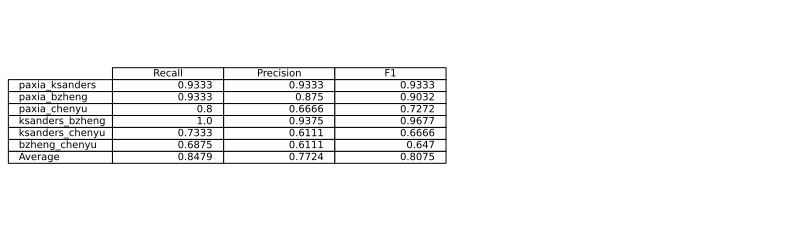

user_id_2 user_id_3 [0.75, 0.75, 0.75]
user_id_2 bzheng [1.0, 1.0, 1.0]
user_id_2 user_id_4 [0.875, 0.875, 0.875]
user_id_3 bzheng [0.75, 0.75, 0.75]
user_id_3 user_id_4 [0.75, 0.75, 0.75]
bzheng user_id_4 [0.875, 0.875, 0.875]
[1.8225, 1.7345, 1.7754]


ValueError: 'rowLabels' must be of length 14

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

fig, ax =plt.subplots(1,1)

keys = ['user_id_2', 'user_id_3', 'bzheng', 'user_id_4']
# print("Key  ", "Response", "Recall", "")
x_names = ["Recall", "Precision", "F1"]
data = []
for i, item_key in enumerate(results):
    # if i!=2:
    #     continue
    item = results[item_key]
    # data = []
    y_names = []
    for i in range(len(keys)):
        for j in range(i+1, len(keys)):
            name1 = keys[i]
            name2 = keys[j]
            print(name1, name2, [float(str(x)[:6]) for x in item[name1][name2]])
            data.append([float(str(x)[:6]) for x in item[name1][name2]])
            y_names.append(name1+"_"+name2)
    temp = [0, 0, 0]
    for item in data:
        for i in range(len(item)):
            temp[i] += item[i]
    print([float(str(x/6)[:6]) for x in temp])
    data.append([float(str(x/6)[:6]) for x in temp])
    y_names.append("Average")

    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=data, rowLabels=y_names,colLabels=x_names,loc="left", rowLoc="left")
    plt.show()

In [17]:
temp = [0, 0, 0]
for item in data:
    for i in range(len(item)):
        temp[i] += item[i]
# print(data)
print([x/len(data) for x in temp])

[0.7906666666666669, 0.8250666666666668, 0.8003833333333334]


In [129]:
for item in data:
    print(item)

[0.9615, 0.9615, 0.9615]
[0.9615, 0.9285, 0.9447]
[0.8846, 0.7931, 0.8363]
[1.0, 0.9642, 0.9818]
[0.8461, 0.7586, 0.7999]
[0.8214, 0.7586, 0.7887]
[0.8333, 0.8333, 0.8333]
[1.0, 1.0, 1.0]
[0.9166, 0.9166, 0.9166]
[0.8333, 0.8333, 0.8333]
[0.8333, 0.8333, 0.8333]
[0.9166, 0.9166, 0.9166]
[0.885, 0.8902, 0.8876]
[0.931, 0.8484, 0.8878]
[0.7241, 0.9361, 0.8166]
[0.817, 0.7474, 0.7807]
[0.7195, 0.9361, 0.8136]
[0.6666, 0.9361, 0.7787]


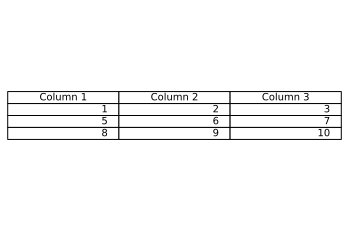

In [9]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1)
data=[[1,2,3],
      [5,6,7],
      [8,9,10]]
column_labels=["Column 1", "Column 2", "Column 3"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

In [9]:
for scene_key in scenes:
    scene = scenes[scene_key]
    for sample in scene:
        for item in sample['answer_spans']:
            answers = []
            for answer in item['span_list']:
                answers.append((answer['sentenceIndex'], answer['startToken'], answer['endToken']))
            print(answers)
        print("=="*50)

[(-1, -1, -1)]
[(0, 0, 1)]
[(-1, -1, -1)]
[(3, 0, 1)]
[(-1, -1, -1)]
[(3, 2, 3)]
[(3, 6, 8)]
[(2, 0, 1)]
[(3, 9, 10)]
[(3, 16, 17)]
[(-1, -1, -1)]
[(3, 9, 10)]
[(-1, -1, -1)]
[(4, 0, 1)]
[(3, 26, 29)]
[(-1, -1, -1)]
[(4, 2, 3)]
[(-1, -1, -1)]
[(4, 6, 7)]
[(4, 0, 1)]
[(4, 18, 19)]
[(4, 15, 16)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(0, 0, 1)]
[(-1, -1, -1)]
[(3, 0, 1)]
[(-1, -1, -1)]
[(3, 0, 1)]
[(3, 6, 8)]
[(2, 0, 1)]
[(3, 0, 1)]
[(2, 0, 1)]
[(-1, -1, -1)]
[(3, 0, 1)]
[(-1, -1, -1)]
[(4, 0, 1)]
[(3, 26, 29)]
[(3, 32, 33)]
[(4, 0, 1)]
[(-1, -1, -1)]
[(3, 26, 29)]
[(4, 0, 1)]
[(3, 26, 29)]
[(4, 15, 16)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(0, 0, 1)]
[(-1, -1, -1)]
[(3, 0, 1)]
[(-1, -1, -1)]
[(3, 0, 1)]
[(-1, -1, -1)]
[(2, 0, 1)]
[(3, 0, 1)]
[(2, 0, 1)]
[(-1, -1, -

## Part 2: Evaluation

This part consists of: 1.Mention Recall  2.Kappa Cohen  3.MUC

In [6]:
from utils.evaluation_util import kappa
from utils.evaluation_util import muc
from utils.evaluation_util import phi4
from utils.evaluation_util import b_cubed
from utils.evaluation_util import exact_match
from utils.evaluation_util import ceafe

In [8]:
for item in scenes:
    sample1, sample2 = scenes[item][0], scenes[item][1]
    print(len(sample1['sentences']), "Kappa:", kappa(sample1, sample2), "|", "Exact Match:",exact_match(sample1, sample2) , "|", "MUC:", muc(sample1, sample2), "|", "CEAFE:", ceafe(sample1, sample2), "|", "B Cubed:", b_cubed(sample1, sample2))

9 Kappa: 0.7819971870604782 | Exact Match: 0.8387096774193549 | MUC: (0, 28) | CEAFE: (7.0, 8, 7.0, 19) | B Cubed: (0.0, 36)
11 Kappa: 0.9090909090909091 | Exact Match: 0.9333333333333333 | MUC: (0, 19) | CEAFE: (4.0, 4, 4.0, 10) | B Cubed: (0.0, 23)
31 Kappa: 0.6983758700696056 | Exact Match: 0.7523809523809524 | MUC: (0, 99) | CEAFE: (24.734523809523807, 30, 24.734523809523807, 65) | B Cubed: (0.0, 129)


In [10]:
from statsmodels.stats.inter_rater import fleiss_kappa
from statsmodels.stats.inter_rater import cohens_kappa

In [11]:
# Load Kate Annotation
kate = read_annotation('data/kate.csv')
for item in kate:
    item['Turkle.Username'] = "user_id_3"

user_id_4 = read_annotation('data/user_id_4.csv')
for item in user_id_4:
    item['Turkle.Username'] = "user_id_4"

person_name_1_person_name_2 = read_annotation('data/results.csv')

results = []
results.extend(kate)
results.extend(person_name_1_person_name_2)
results.extend(user_id_4)

scenes = gather_by_scene(results)

[(0, 4, 5)]
[(0, 7, 8), (0, 0, 1)]
[(0, 12, 14)]
[(3, 2, 3), (3, 0, 1)]
[(3, 6, 8)]
[(3, 9, 10), (3, 2, 3)]
[(3, 13, 14), (3, 6, 8)]
[(3, 16, 17), (2, 0, 1)]
[(3, 19, 20), (3, 9, 10)]
[(3, 24, 25), (3, 16, 17)]
[(3, 26, 29)]
[(3, 30, 31), (3, 9, 10)]
[(3, 32, 33)]
[(4, 2, 3), (4, 0, 1)]
[(4, 6, 7), (3, 26, 29)]
[(4, 8, 10)]
[(4, 11, 12), (4, 2, 3)]
[(4, 15, 16)]
[(4, 18, 19), (4, 6, 7)]
[(4, 20, 21), (4, 0, 1)]
[(4, 26, 27), (4, 18, 19)]
[(5, 5, 6), (4, 15, 16)]
[(5, 16, 17)]
[(7, 4, 5)]
[(7, 9, 10)]
[(7, 11, 12)]
[(7, 13, 16)]
[(7, 17, 18)]
[(0, 8, 10)]
[(1, 9, 10), (1, 0, 1)]
[(1, 12, 14)]
[(2, 3, 4), (1, 9, 10)]
[(4, 5, 6), (3, 0, 1)]
[(4, 9, 10)]
[(6, 2, 5), (5, 5, 7)]
[(7, 2, 3), (6, 2, 5), (5, 0, 1)]
[(7, 5, 6)]
[(8, 2, 4), (7, 2, 3)]
[(8, 13, 17)]
[(9, 2, 3), (8, 2, 4)]
[(9, 7, 8), (9, 2, 3)]
[(0, 2, 3), (0, 0, 1)]
[(0, 8, 10)]
[(0, 8, 9)]
[(0, 15, 16)]
[(1, 4, 6), (0, 8, 10)]
[(2, 3, 4), (1, 0, 1)]
[(2, 5, 6), (0, 15, 16)]
[(2, 7, 11)]
[(3, 2, 4)]
[(4, 7, 9)]
[(4, 7, 8), (5, 0,

In [12]:
def label_mention_to_cluster(instance, golden_clusters):
    """
    Assign cluster id to mention query
    If answer is notMention, label==-1
    If answer is singleton, label==-2
    Else, label==cluster_id
    """
    mentions = instance['answers']
    labels = []
    for query, answer in mentions:
        # -1: notMention, -2: Singleton, index: cluster_id
        # If it is not mention
        if answer == "notMention":
            labels.append(-1)
        else:
            idx = -2
            for i, cluster in enumerate(golden_clusters):
                if (answer[0] in cluster) and (len(cluster) != 1):
                    idx = i
            labels.append(idx)
    return labels

In [89]:
def muc_temp(instance1, instance2):
    """
    Counts the mentions in each predicted cluster which need to be re-allocated in
    order for each predicted cluster to be contained by the respective gold cluster.
    <https://aclweb.org/anthology/M/M95/M95-1005.pdf>
    """
    clusters = []
    for cluster in instance1['clusters']:
        if len(cluster)>1:
            clusters.append(cluster)
    # clusters = instance1['clusters']
    mention_to_gold = {}
    for item in instance2['answers']:
        if item[1] not in ["notPresent", "notMention"]:
            mention_to_gold[item[0]] = item[1][0]
    for item in clusters:
        print(item)
    # print(clusters)
    # print(mention_to_gold)
    true_p, all_p = 0, 0
    for cluster in clusters:
        all_p += len(cluster) - 1
        true_p += len(cluster)
        linked = set()
        for mention in cluster:
            if mention in mention_to_gold:
                linked.add(mention_to_gold[mention])
            else:
                true_p -= 1
        true_p -= len(linked)
    return true_p, all_p

In [90]:
print(scenes.keys())

dict_keys([":|Where|'d|you|go|?|I|ca|n't", ':|Oh|,|yeah|,|no|,|this|thing', ':|We|just|wanted|to|see|how|your|class'])


In [91]:
scene = scenes[":|We|just|wanted|to|see|how|your|class"]
score = muc_temp(scene[0], scene[2])
print(score, score[0]/score[1])

[(0, 2, 3), (0, 0, 1)]
[(0, 8, 10), (1, 4, 6), (0, 8, 10)]
[(0, 15, 16), (2, 5, 6), (0, 15, 16)]
[(2, 3, 4), (1, 0, 1)]
[(4, 7, 8), (5, 0, 1), (5, 2, 3), (5, 0, 1), (5, 14, 15), (5, 2, 3)]
[(7, 6, 7), (7, 0, 1)]
[(8, 9, 10), (8, 0, 1), (8, 13, 14), (8, 9, 10), (9, 4, 5), (8, 13, 14)]
[(9, 8, 9), (9, 0, 1), (6, 0, 1), (2, 0, 1), (9, 8, 9), (9, 0, 1), (6, 0, 1), (2, 0, 1), (9, 8, 9), (9, 0, 1), (6, 0, 1), (2, 0, 1), (9, 8, 9), (9, 0, 1), (6, 0, 1), (2, 0, 1)]
[(10, 6, 8), (10, 44, 46), (10, 6, 8)]
[(10, 9, 11), (10, 23, 24), (10, 9, 11)]
[(10, 28, 29), (10, 39, 40), (10, 28, 29), (10, 40, 41), (10, 39, 40)]
[(10, 34, 35), (10, 0, 1), (10, 56, 57), (10, 34, 35), (11, 8, 9), (10, 56, 57)]
[(10, 59, 61), (10, 45, 46)]
[(11, 6, 7), (11, 0, 1), (13, 4, 5), (11, 6, 7), (13, 12, 13), (11, 6, 7)]
[(11, 8, 10), (1, 5, 6)]
[(15, 2, 3), (15, 0, 1), (15, 7, 8), (15, 2, 3), (16, 25, 26), (15, 0, 1)]
[(15, 11, 12), (12, 0, 1)]
[(16, 6, 7), (16, 0, 1), (16, 21, 22), (16, 6, 7), (16, 31, 32), (16, 21, 2

In [17]:
scene = scenes[":|Where|'d|you|go|?|I|ca|n't"]

golden_clusters = scene[0]['clusters']
label1 = label_mention_to_cluster(scene[0], golden_clusters)
label2 = label_mention_to_cluster(scene[1], golden_clusters)
label3 = label_mention_to_cluster(scene[2], golden_clusters)
label4 = label_mention_to_cluster(scene[3], golden_clusters)

In [29]:
temp = {}
for item in temp:
    print(item, temp[item])

for item in scene[0]['answers']:
    print(item[0], item[1])

(0, 4, 5) notPresent
(0, 7, 8) [(0, 0, 1)]
(0, 12, 14) notPresent
(3, 2, 3) [(3, 0, 1)]
(3, 6, 8) notPresent
(3, 9, 10) [(3, 2, 3)]
(3, 13, 14) [(3, 6, 8)]
(3, 16, 17) [(2, 0, 1)]
(3, 19, 20) [(3, 9, 10)]
(3, 24, 25) [(3, 16, 17)]
(3, 26, 29) notPresent
(3, 30, 31) [(3, 9, 10)]
(3, 32, 33) notPresent
(4, 2, 3) [(4, 0, 1)]
(4, 6, 7) [(3, 26, 29)]
(4, 8, 10) notPresent
(4, 11, 12) [(4, 2, 3)]
(4, 15, 16) notPresent
(4, 18, 19) [(4, 6, 7)]
(4, 20, 21) [(4, 0, 1)]
(4, 26, 27) [(4, 18, 19)]
(5, 5, 6) [(4, 15, 16)]
(5, 8, 9) notMention
(5, 12, 15) notMention
(5, 16, 17) notPresent
(7, 2, 3) notMention
(7, 4, 5) notPresent
(7, 9, 10) notPresent
(7, 11, 12) notPresent
(7, 13, 16) notPresent
(7, 17, 18) notPresent


In [26]:
print(scene[0]['answers'])

[[(0, 4, 5), 'notPresent'], [(0, 7, 8), [(0, 0, 1)]], [(0, 12, 14), 'notPresent'], [(3, 2, 3), [(3, 0, 1)]], [(3, 6, 8), 'notPresent'], [(3, 9, 10), [(3, 2, 3)]], [(3, 13, 14), [(3, 6, 8)]], [(3, 16, 17), [(2, 0, 1)]], [(3, 19, 20), [(3, 9, 10)]], [(3, 24, 25), [(3, 16, 17)]], [(3, 26, 29), 'notPresent'], [(3, 30, 31), [(3, 9, 10)]], [(3, 32, 33), 'notPresent'], [(4, 2, 3), [(4, 0, 1)]], [(4, 6, 7), [(3, 26, 29)]], [(4, 8, 10), 'notPresent'], [(4, 11, 12), [(4, 2, 3)]], [(4, 15, 16), 'notPresent'], [(4, 18, 19), [(4, 6, 7)]], [(4, 20, 21), [(4, 0, 1)]], [(4, 26, 27), [(4, 18, 19)]], [(5, 5, 6), [(4, 15, 16)]], [(5, 8, 9), 'notMention'], [(5, 12, 15), 'notMention'], [(5, 16, 17), 'notPresent'], [(7, 2, 3), 'notMention'], [(7, 4, 5), 'notPresent'], [(7, 9, 10), 'notPresent'], [(7, 11, 12), 'notPresent'], [(7, 13, 16), 'notPresent'], [(7, 17, 18), 'notPresent']]


In [25]:
for item in scene[0]:
    print(item)

HITId
HITTypeId
Title
CreationTime
MaxAssignments
AssignmentDurationInSeconds
AssignmentId
WorkerId
AcceptTime
SubmitTime
WorkTimeInSeconds
sentences
answer_spans
Turkle.Username
clusters
answers


In [18]:
print(label1)
print(label2)
print(label3)
print(label4)

[-2, 1, -2, 3, -2, 3, 4, 5, 3, 5, -2, 3, -2, 8, 6, -2, 8, -2, 6, 8, 6, 10, -1, -1, -2, -1, -2, -2, -2, -2, -2]
[-2, 1, -2, 3, -2, 3, 4, 5, 3, 5, -2, 3, -2, 8, 6, -2, 8, -2, 6, 8, 6, 10, -1, -1, -2, -2, -2, -2, -2, -2, -2]
[-2, 1, -2, 3, -2, 3, -2, 5, 3, 5, -2, 3, -2, 8, 6, -2, 8, -2, 6, 8, 6, 10, -2, -2, -2, -2, -2, -1, -2, -2, -2]
[-2, 1, -2, 3, -2, 3, -2, 5, 3, 5, -2, 3, -2, 8, -2, -2, 8, -2, -2, 8, -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -2]


In [15]:
from utils.b_score import calc_b3

In [93]:
# print(calc_b3(label1, label2))
# print(calc_b3(label1, label3))
print(calc_b3(label1, label4))

[0.7468516826947749, 0.6193548387096774, 0.9404466501240695]


In [21]:
table = [label1, label2]
print(fleiss_kappa(table))

AssertionError: 

In [11]:
print(len(scenes[":|Where|'d|you|go|?|I|ca|n't"]))

4


In [145]:
import csv
import json
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
import numpy as np
from typing import Any, Dict, List, Tuple
from collections import Counter


def mention_detection_label(instance):
    """
    Assign cluster id to mention query
    If answer is notMention, label==-1
    If answer is singleton, label==-2
    Else, label==cluster_id
    """
    mentions = instance['answers']
    labels = []
    for query, answer in mentions:
        # -1: notMention, -2: Singleton, index: cluster_id
        # If it is not mention
        if answer == "notMention":
            labels.append(1)
        else:
            labels.append(2)
    return labels


def kappa_mention_detection(instance1, instance2):
    label1 = mention_detection_label(instance1)
    label2 = mention_detection_label(instance2)
    return cohen_kappa_score(label1, label2)

def exact_match_mention_detection(instance1, instance2):
    label1 = mention_detection_label(instance1)
    label2 = mention_detection_label(instance2)
    return accuracy_score(label1, label2)

In [146]:
for scene_key in scenes:
    scene = scenes[scene_key]
    for sample1 in scene:
        for sample2 in scene:
            print(sample1['Turkle.Username'], sample2['Turkle.Username'], len(sample1['sentences']), "Kappa:", kappa_mention_detection(sample1, sample2), "|", "Exact:", exact_match_mention_detection(sample1, sample2))
    print("=="*50)

user_id_3 user_id_3 9 Kappa: 1.0 | Exact: 1.0
user_id_3 bzheng 9 Kappa: 0.7832167832167832 | Exact: 0.967741935483871
user_id_3 user_id_2 9 Kappa: -0.05084745762711851 | Exact: 0.8709677419354839
user_id_3 user_id_4 9 Kappa: -0.05084745762711851 | Exact: 0.8709677419354839
bzheng user_id_3 9 Kappa: 0.7832167832167832 | Exact: 0.967741935483871
bzheng bzheng 9 Kappa: 1.0 | Exact: 1.0
bzheng user_id_2 9 Kappa: -0.04494382022471899 | Exact: 0.9032258064516129
bzheng user_id_4 9 Kappa: -0.04494382022471899 | Exact: 0.9032258064516129
user_id_2 user_id_3 9 Kappa: -0.05084745762711851 | Exact: 0.8709677419354839
user_id_2 bzheng 9 Kappa: -0.04494382022471899 | Exact: 0.9032258064516129
user_id_2 user_id_2 9 Kappa: 1.0 | Exact: 1.0
user_id_2 user_id_4 9 Kappa: -0.033333333333333215 | Exact: 0.9354838709677419
user_id_4 user_id_3 9 Kappa: -0.05084745762711851 | Exact: 0.8709677419354839
user_id_4 bzheng 9 Kappa: -0.04494382022471899 | Exact: 0.9032258064516129
user_id_4 user_id_2 9 Kappa: -0.0

/Users/boyuanzheng/.conda/envs/multi_coref/lib/python3.8/site-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/boyuanzheng/.conda/envs/multi_coref/lib/python3.8/site-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/boyuanzheng/.conda/envs/multi_coref/lib/python3.8/site-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/boyuanzheng/.conda/envs/multi_coref/lib/python3.8/site-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/boyuanzheng/.conda/envs/multi_coref/lib/python3.8/site-packages/sklearn/metrics/_clas

In [ ]:
name = ['user_id_3', 'bzheng', 'user_id_2', 'user_id_4']

for scene_key in scenes:
    scene = scenes[scene_key]
    for sample1 in scene:
        for sample2 in scene:
            print(sample1['Turkle.Username'], sample2['Turkle.Username'], len(sample1['sentences']), "Kappa:", kappa(sample1, sample2), "|", "Exact Match:", exact_match(sample1, sample2))
    print("=="*50)

In [137]:
name = ['user_id_3', 'bzheng', 'user_id_2', 'user_id_4']

for scene_key in scenes:
    scene = scenes[scene_key]
    for sample1 in scene:
        for sample2 in scene:
            print(sample1['Turkle.Username'], sample2['Turkle.Username'], len(sample1['sentences']), len(sample1['answers']), "Kappa:", kappa(sample1, sample2), "|", "Exact Match:",exact_match(sample1, sample2))
    print("=="*50)

user_id_3 user_id_3 9 31 Kappa: 1.0 | Exact Match: 1.0
user_id_3 bzheng 9 31 Kappa: 0.9576502732240437 | Exact Match: 0.967741935483871
user_id_3 user_id_2 9 31 Kappa: 0.7816901408450704 | Exact Match: 0.8387096774193549
user_id_3 user_id_4 9 31 Kappa: 0.5823353293413174 | Exact Match: 0.7096774193548387
bzheng user_id_3 9 31 Kappa: 0.9167785234899328 | Exact Match: 0.9354838709677419
bzheng bzheng 9 31 Kappa: 1.0 | Exact Match: 1.0
bzheng user_id_2 9 31 Kappa: 0.7819971870604782 | Exact Match: 0.8387096774193549
bzheng user_id_4 9 31 Kappa: 0.5829596412556053 | Exact Match: 0.7096774193548387
user_id_2 user_id_3 9 31 Kappa: 0.7810734463276836 | Exact Match: 0.8387096774193549
user_id_2 bzheng 9 31 Kappa: 0.8213256484149856 | Exact Match: 0.8709677419354839
user_id_2 user_id_2 9 31 Kappa: 1.0 | Exact Match: 1.0
user_id_2 user_id_4 9 31 Kappa: 0.6555555555555554 | Exact Match: 0.7741935483870968
user_id_4 user_id_3 9 31 Kappa: 0.735494880546075 | Exact Match: 0.8387096774193549
user_id_